In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

img = plt.imread('../../images/desktop.png')
type(img)

numpy.ndarray

In [4]:
img.shape

(637, 1019, 3)

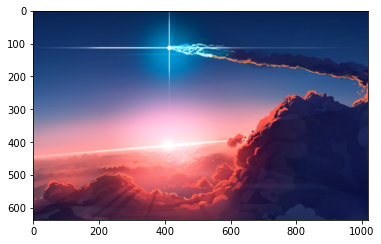

In [5]:
plt.imshow(img)

In [6]:
R = img[:,:,0]
R.shape

(637, 1019)

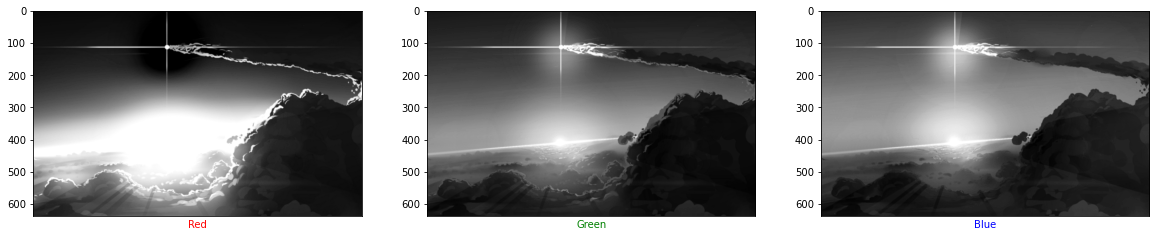

In [7]:
fig, ax = plt.subplots(1,3)
ch = ['Red', 'Green', 'Blue']

for i, axi in enumerate(ax.flat):
    axi.imshow(img[:,:,i],plt.cm.gray)
    axi.set(xticks=[])
    axi.set_xlabel(ch[i],color=ch[i].lower())
    fig.set_size_inches(20,50)

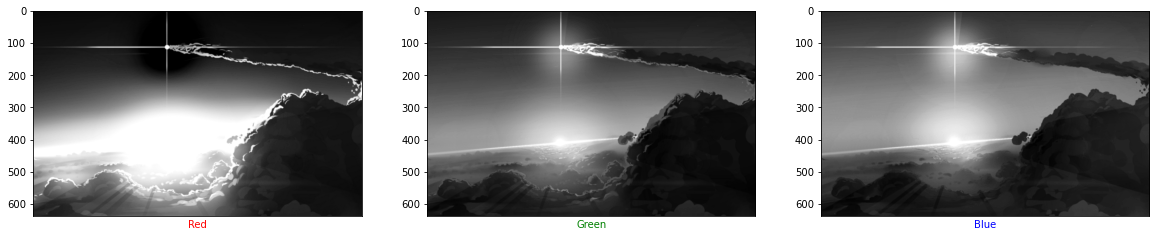

In [8]:
fig, ax = plt.subplots(1,3)
img2 = img.copy()
img2[:,:,2] = img[:,:,2]*10
ch = ['Red', 'Green', 'Blue']

for i, axi in enumerate(ax.flat):
    axi.imshow(img2[:,:,i],plt.cm.gray)
    axi.set(xticks=[])
    axi.set_xlabel(ch[i],color=ch[i].lower())
    fig.set_size_inches(20,50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


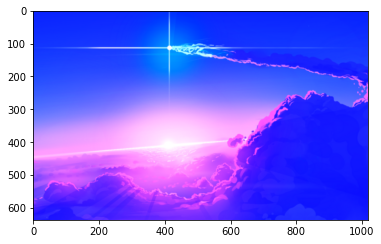

In [9]:
img2[:,:,2] = 200
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


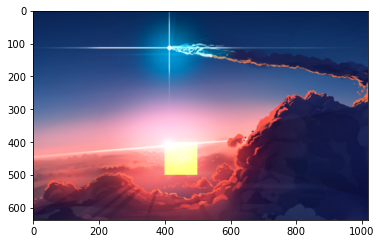

In [10]:
img2 = img.copy()
img2[400:500, 400:500, 1] = 200
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


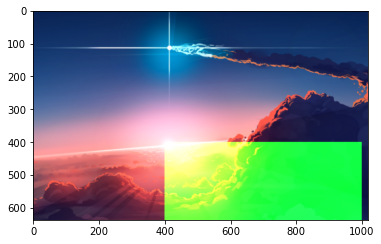

In [11]:
img2 = img.copy()
img2[400:1000, 400:1000, 1] = 200
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


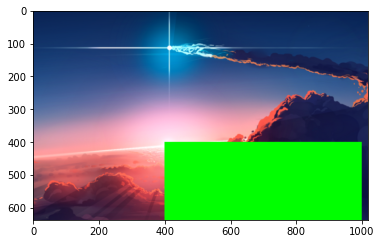

In [12]:
img2 = img.copy()
img2[400:1000, 400:1000, 1] = 200
img2[400:1000, 400:1000, 0] = 0
img2[400:1000, 400:1000, 2] = 0
plt.imshow(img2)

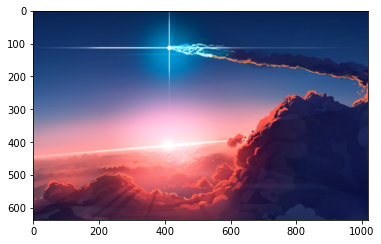

In [13]:
img2 = img.copy()
plt.imshow(img2)

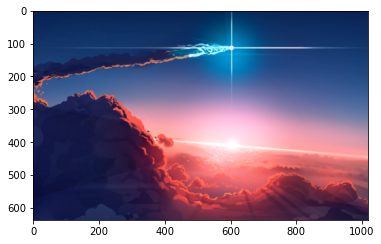

In [14]:
idx = np.arange(img2.shape[1])
img3 = img2[:,idx[::-1],:]
plt.imshow(img3)

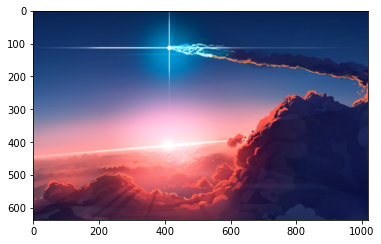

In [15]:
img4 = img.copy()
plt.imshow(img4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


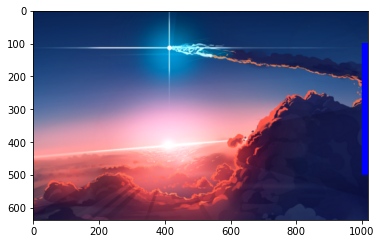

In [16]:
img4[100:500,1000:2000,0] = 0
img4[100:500,1000:2000,1] = 0
img4[100:500,1000:2000,2] = 200

plt.imshow(img4)

In [17]:
# Loading iris data
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
iris.data.shape

(150, 4)

In [20]:
X = iris.data
y = iris.target

In [21]:
np.unique(y)

array([0, 1, 2])

In [22]:
y.shape

(150,)

In [23]:
y[100]

2

In [24]:
X[100,:]

array([6.3, 3.3, 6. , 2.5])

In [25]:
def myTrainTestSplit(X, y, test_size):
    idx = np.random.permutation(np.arange(X.shape[0]))
    test_s = int(np.floor(test_size*X.shape[0]))
    testIdx = idx[:test_s]
    trainIdx = idx[test_s:]
    Xtrain = X[trainIdx,:]
    ytrain = y[trainIdx]
    Xtest = X[testIdx,:]
    ytest = y[testIdx]
    
    return Xtrain, ytrain, Xtest, ytest
    

In [26]:
Xtrain, ytrain, Xtest, ytest = myTrainTestSplit(X, y, 0.2)

In [27]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(Xtest.shape)

(120, 4)
(120,)
(30, 4)
(30, 4)


In [28]:
D = np.sum((Xtrain[:,np.newaxis,:]-Xtest[np.newaxis,:,:])**2, axis=2)

In [29]:
D.shape

(120, 30)

In [30]:
D[0,0]

0.9400000000000006

In [31]:
D[0,15]

3.7800000000000002

In [32]:
nidx = np.argsort(D, axis=0)
nidx

array([[ 86,  83, 116, ...,  22, 117,  84],
       [117, 106,   8, ...,  15,  46, 113],
       [  7,  68,   2, ...,  35,  86,  58],
       ...,
       [ 38,  54,  46, ...,  38,  38,  46],
       [100,  86,  86, ..., 100, 100,  63],
       [ 54,  63,  63, ...,  54,  54,  86]])

In [33]:
nidx[0,:5]

array([ 86,  83, 116,  26,  63])

In [34]:
idx = nidx[:10,15]

In [35]:
from scipy import stats
stats.mode(ytrain[idx])

ModeResult(mode=array([2]), count=array([8]))

In [36]:
X = np.array([('ABC1','DUV001',90, 3.78),
              ('ABC2','DUV002',70, 2.81)],
            dtype=[('Name','U20'),('Id','U10'),
                   ('Marks','i8'),('Gpa','f4')])

In [37]:
X['Name']

array(['ABC1', 'ABC2'], dtype='<U20')

In [38]:
X[['Name','Gpa']]

array([('ABC1', 3.78), ('ABC2', 2.81)],
      dtype={'names':['Name','Gpa'], 'formats':['<U20','<f4'], 'offsets':[0,128], 'itemsize':132})

In [39]:
X = np.array([('Permanent',31,'1990',50000),('Non-Permanent',24,'1997',25000),('Permanent',36,'1985',50000)],
             dtype= [('EmployeeType', 'U20'),('Age','i8'),('BirthYear','U10'),('Salary','i8')])

X['Age']

X['EmployeeType']
X['Salary']

array([50000, 25000, 50000])

In [40]:
A = pd.Series([2,3,4,5], index=['a','b','c','d'])

In [41]:
A

a    2
b    3
c    4
d    5
dtype: int64

In [42]:
grades_dict = {'A':4,'A-':3.5,'B':3,'B-':2.5,'B':2}
grades = pd.Series(grades_dict)

marks_dict = {'A':85,'A-':80,'B':75,'B-':70,'B':65}
marks = pd.Series(marks_dict)

In [43]:
grades.values

array([4. , 3.5, 2. , 2.5])

In [44]:
df = pd.DataFrame({'Marks':marks_dict,'Grades':grades_dict})
df

,Marks,Grades
A,85,4.0
A-,80,3.5
B,65,2.0
B-,70,2.5


In [45]:
df.T

,A,A-,B,B-
Marks,85.0,80.0,65.0,70.0
Grades,4.0,3.5,2.0,2.5


In [46]:
df.values

array([[85. ,  4. ],
       [80. ,  3.5],
       [65. ,  2. ],
       [70. ,  2.5]])

In [52]:
# generate fake dataframe using this module
# This is very nice tool!
from generate_fake_dataframe import generate_fake_dataframe as fd

df_fake = fd(size = 10, cols = "cififficcd")
df_fake

,column_0_cat,column_1_int,column_2_float,column_3_int,column_4_float,column_5_float,column_6_int,column_7_cat,column_8_cat,column_9_date
0,Linda,0,97.807127,3,56.153343,72.820967,7,sheep,Río de Janeiro,2020-03-04
1,Linda,7,70.181964,0,97.356087,98.837707,6,sheep,Río de Janeiro,2020-07-11
2,Patricia,9,43.446900,3,35.923862,48.488934,3,rabbit,Denver,2020-06-18
3,Jennifer,5,59.729629,5,20.262117,79.787137,8,goat,Moscow,2020-03-27
4,Linda,7,80.534696,9,78.510973,94.641419,2,sheep,Moscow,2020-01-21
5,Jennifer,6,88.822272,1,81.107428,90.721213,3,horse,Moscow,2020-04-03
6,Barbara,5,14.972354,0,76.305700,46.285473,6,chicken,Denver,2020-10-03
7,Jennifer,2,94.189952,7,24.750429,70.050050,3,sheep,Río de Janeiro,2020-01-18
8,Linda,8,91.644983,9,81.592026,49.918976,9,rabbit,Río de Janeiro,2020-01-05
9,Barbara,9,86.719028,4,52.418052,41.728594,3,goat,Moscow,2020-05-12


In [54]:
df_fake.iloc[:,0]

0       Linda
1       Linda
2    Patricia
3    Jennifer
4       Linda
5    Jennifer
6     Barbara
7    Jennifer
8       Linda
9     Barbara
Name: column_0_cat, dtype: object

In [55]:
df_fake.iloc[::-1,:] # reverse

,column_0_cat,column_1_int,column_2_float,column_3_int,column_4_float,column_5_float,column_6_int,column_7_cat,column_8_cat,column_9_date
9,Barbara,9,86.719028,4,52.418052,41.728594,3,goat,Moscow,2020-05-12
8,Linda,8,91.644983,9,81.592026,49.918976,9,rabbit,Río de Janeiro,2020-01-05
7,Jennifer,2,94.189952,7,24.750429,70.050050,3,sheep,Río de Janeiro,2020-01-18
6,Barbara,5,14.972354,0,76.305700,46.285473,6,chicken,Denver,2020-10-03
5,Jennifer,6,88.822272,1,81.107428,90.721213,3,horse,Moscow,2020-04-03
4,Linda,7,80.534696,9,78.510973,94.641419,2,sheep,Moscow,2020-01-21
3,Jennifer,5,59.729629,5,20.262117,79.787137,8,goat,Moscow,2020-03-27
2,Patricia,9,43.446900,3,35.923862,48.488934,3,rabbit,Denver,2020-06-18
1,Linda,7,70.181964,0,97.356087,98.837707,6,sheep,Río de Janeiro,2020-07-11
0,Linda,0,97.807127,3,56.153343,72.820967,7,sheep,Río de Janeiro,2020-03-04


In [56]:
df_fake.loc[:,['column_0_cat', 'column_2_float']]

,column_0_cat,column_2_float
0,Linda,97.807127
1,Linda,70.181964
2,Patricia,43.446900
3,Jennifer,59.729629
4,Linda,80.534696
5,Jennifer,88.822272
6,Barbara,14.972354
7,Jennifer,94.189952
8,Linda,91.644983
9,Barbara,86.719028


In [64]:
df_fake['column_0_cat'].unique().size

4

In [65]:
df_fake.isnull().sum()

column_0_cat      0
column_1_int      0
column_2_float    0
column_3_int      0
column_4_float    0
column_5_float    0
column_6_int      0
column_7_cat      0
column_8_cat      0
column_9_date     0
dtype: int64

In [66]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   column_0_cat    10 non-null     object        
 1   column_1_int    10 non-null     int64         
 2   column_2_float  10 non-null     float64       
 3   column_3_int    10 non-null     int64         
 4   column_4_float  10 non-null     float64       
 5   column_5_float  10 non-null     float64       
 6   column_6_int    10 non-null     int64         
 7   column_7_cat    10 non-null     object        
 8   column_8_cat    10 non-null     object        
 9   column_9_date   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 928.0+ bytes
